Running the example, the accuracy on the training and validation test is printed
each epoch and at the end of the classification error rate is printed.

Note: Your results may vary given the stochastic nature of the algorithm or
evaluation procedure, or differences in numerical precision. Consider running the example
a few times and compare the average outcome.

In [1]:
import numpy as np
import random
# Simple ANN for the FaSion_MNIST Dataset
from keras.datasets import fashion_mnist,mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# plot data samples
def plotSamples(data,rows,cols,tLabels,names,pLabels=[]):
    fig, axs = plt.subplots(rows,cols)
    nDigits = data.shape[0]
    for i in range(rows):
        for j in range(cols):
            index = random.randint(0,nDigits-1)
            axs[i,j].imshow(data[index],cmap = 'gray')
            # remove axes titles
            axs[i,j].axis('off')
            if (np.any(pLabels)):
                axs[i,j].set_title('P: %s, T: %s' % (
                    names[pLabels[index]], names[tLabels[index]]) ,fontdict={'fontsize': 10})
            else:
                axs[i,j].set_title('T: %s' % names[tLabels[index]],fontdict={'fontsize': 10})
            # show the figure
    plt.show()

In [3]:
# define a simple ANN model
def baseline_model(nClasses):
	# create model
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(nClasses, activation="softmax"))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

In [4]:
def plotTrainingCurves(history,numEpochs):
  #Process ploting
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['val_loss'])
  plt.axis([0,numEpochs,0,1])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Accuracy','loss','val_accuracy','val_loss'], loc='lower left')
  plt.show()

In [5]:
# load data
(trainData, trainLabels), (testData, testLabels) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainData.shape, trainLabels.shape))
print('Test: X=%s, y=%s' % (testData.shape, testLabels.shape))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [6]:
names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

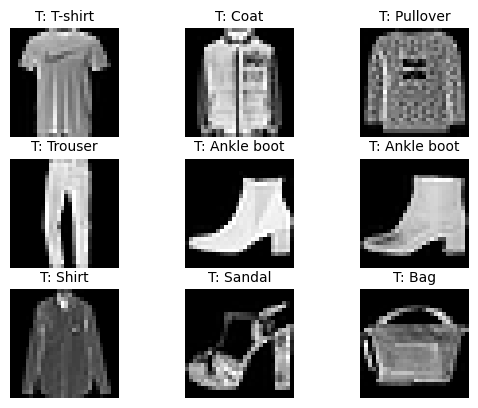

In [16]:
# plot random 9 images
rows = 3
cols = 3

plotSamples(trainData,rows,cols,trainLabels,names)

In [8]:
# encode outputs
catTrainLabels = to_categorical(trainLabels)
catTestLabels = to_categorical(testLabels)

In [9]:
XtrainData = trainData/255.0
XtestData = testData/255.0

In [10]:
# build the model
nClasses = catTestLabels.shape[1]
model = baseline_model(nClasses)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Fit the model
numEpochs = 10
history=model.fit(XtrainData, catTrainLabels, validation_data=(XtestData, catTestLabels),
                  epochs=numEpochs, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6931 - loss: 0.9120 - val_accuracy: 0.8275 - val_loss: 0.5012
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8398 - loss: 0.4684 - val_accuracy: 0.8378 - val_loss: 0.4666
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8529 - loss: 0.4207 - val_accuracy: 0.8494 - val_loss: 0.4321
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8679 - loss: 0.3844 - val_accuracy: 0.8534 - val_loss: 0.4227
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8723 - loss: 0.3658 - val_accuracy: 0.8453 - val_loss: 0.4254
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8741 - loss: 0.3603 - val_accuracy: 0.8522 - val_loss: 0.4098
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8804 - loss: 0.3380 - val_accuracy: 0.8561 - val_loss: 0.3978
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8781 - loss: 0.3397 - val_accuracy: 

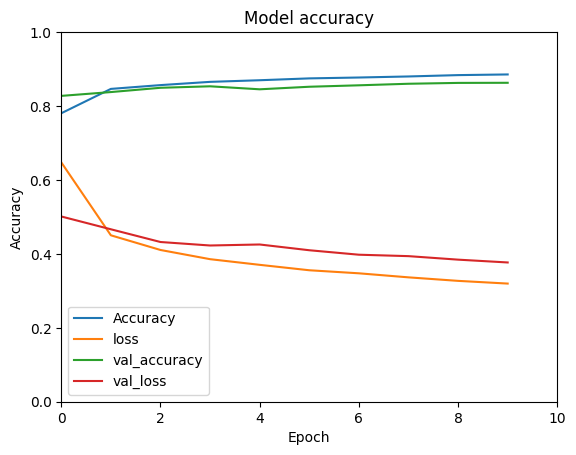

In [12]:
plotTrainingCurves(history,numEpochs)

In [13]:
# Final evaluation of the model
scores = model.evaluate(XtestData, catTestLabels, verbose=0)
print("ANN validation accuracy: %.2f" % (scores[1]))

ANN validation accuracy: 0.86


In [14]:
#make  predictions
predLabels = model.predict(testData).argmax(1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


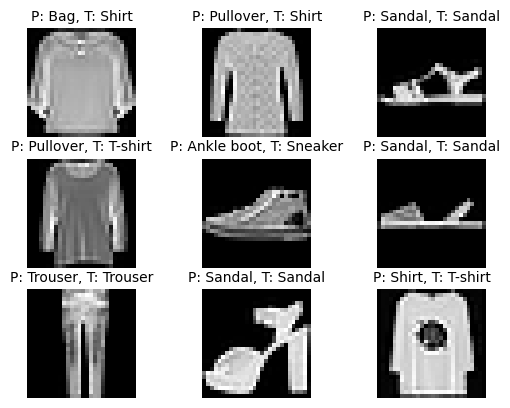

In [15]:
# plot random 9 images
plotSamples(XtestData,rows,cols,testLabels,names,predLabels)

step 1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,212 (160.98 KB)

 Trainable params: 41,212 (160.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6785 - loss: 0.9750 - val_accuracy: 0.8217 - val_loss: 0.5002
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8461 - loss: 0.4455 - val_accuracy: 0.8482 - val_loss: 0.4285
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8642 - loss: 0.3906 - val_accuracy: 0.8485 - val_loss: 0.4360
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8677 - loss: 0.3770 - val_accuracy: 0.8559 - val_loss: 0.4036
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8754 - loss: 0.3555 - val_accuracy: 0.8485 - val_loss: 0.4116
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8779 - loss: 0.3408 - val_accuracy: 0.8607 - val_loss: 0.3890
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8824 - loss: 0.3313 - val_accuracy: 0.8664 - val_loss: 0.3755
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8824 - loss: 0.3267 - val_accuracy: 

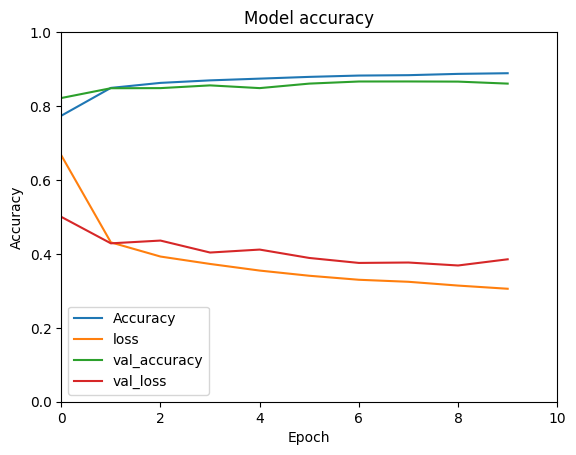

NEW ANN validation accuracy: 0.86


In [17]:

def new_model(nClasses):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28]))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(nClasses, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model


nClasses = catTestLabels.shape[1]
model2 = new_model(nClasses)
model2.summary()

numEpochs = 10
history2 = model2.fit(
    XtrainData, catTrainLabels,
    validation_data=(XtestData, catTestLabels),
    epochs=numEpochs,
    batch_size=200
)

plotTrainingCurves(history2, numEpochs)

scores2 = model2.evaluate(XtestData, catTestLabels, verbose=0)
print("NEW ANN validation accuracy: %.2f" % (scores2[1]))

step 5

In [18]:
# predictions from the NEW model
predLabels = model2.predict(XtestData).argmax(axis=1)
trueLabels = testLabels

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


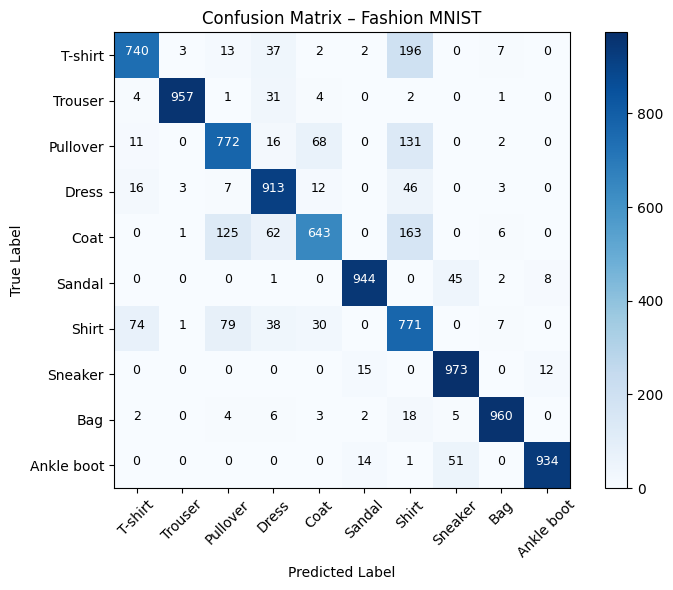

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# compute confusion matrix
cm = confusion_matrix(trueLabels, predLabels)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix – Fashion MNIST")
plt.colorbar()

tick_marks = np.arange(len(names))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)

# add numbers inside the cells
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=9)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [20]:
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

i, j = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)

print("Most confused pair:")
print("True:", names[i])
print("Predicted:", names[j])
print("Number of confusions:", cm_no_diag[i, j])

Most confused pair:
True: T-shirt
Predicted: Shirt
Number of confusions: 196


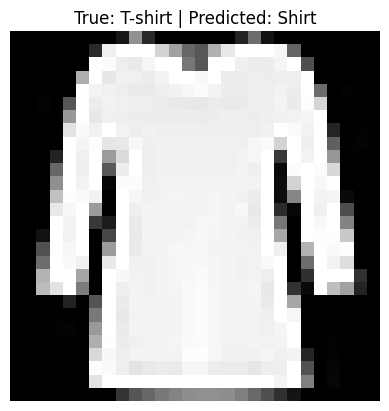

In [21]:
# find one example of confusion
for idx in range(len(trueLabels)):
    if trueLabels[idx] == i and predLabels[idx] == j:
        plt.imshow(XtestData[idx], cmap='gray')
        plt.title(f"True: {names[i]} | Predicted: {names[j]}")
        plt.axis('off')
        plt.show()
        break

step 6

In [23]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random

# load MNIST dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

print('Train:', trainX.shape, trainY.shape)
print('Test:', testX.shape, testY.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


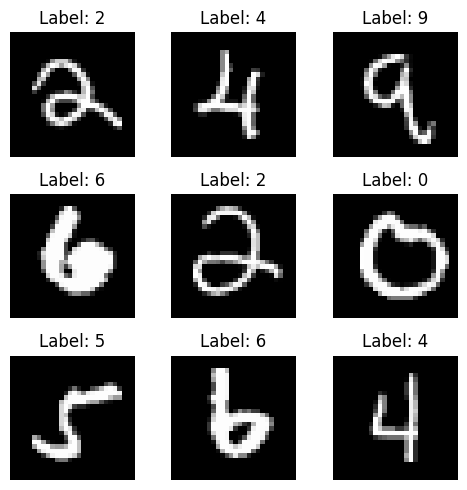

In [24]:
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(5,5))

for i in range(rows):
    for j in range(cols):
        idx = random.randint(0, trainX.shape[0] - 1)
        axs[i, j].imshow(trainX[idx], cmap='gray')
        axs[i, j].set_title(f"Label: {trainY[idx]}")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

step 7

In [25]:
from keras.utils import to_categorical

# normalize
Xtrain_mnist = trainX / 255.0
Xtest_mnist  = testX / 255.0

# one-hot encode labels
ytrain_mnist = to_categorical(trainY)
ytest_mnist  = to_categorical(testY)

nClasses = ytest_mnist.shape[1]  # should be 10

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7514 - loss: 0.9044 - val_accuracy: 0.9252 - val_loss: 0.2695
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9293 - loss: 0.2524 - val_accuracy: 0.9424 - val_loss: 0.2060
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9455 - loss: 0.1968 - val_accuracy: 0.9513 - val_loss: 0.1746
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9542 - loss: 0.1629 - val_accuracy: 0.9575 - val_loss: 0.1526
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9603 - loss: 0.1429 - val_accuracy: 0.9587 - val_loss: 0.1429
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9651 - loss: 0.1248 - val_accuracy: 0.9615 - val_loss: 0.1331
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9675 - loss: 0.1137 - val_accuracy: 0.9620 - val_loss: 0.1251
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9711 - loss: 0.1038 - val_accuracy: 0

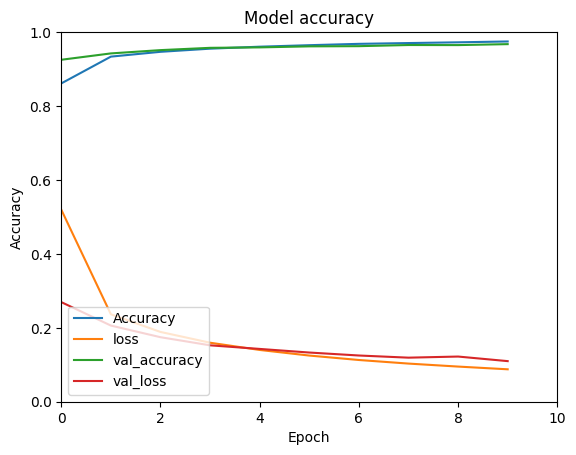

MNIST ANN validation accuracy: 0.97


In [26]:
model_mnist = baseline_model(nClasses)
model_mnist.summary()

numEpochs = 10
history_mnist = model_mnist.fit(
    Xtrain_mnist, ytrain_mnist,
    validation_data=(Xtest_mnist, ytest_mnist),
    epochs=numEpochs,
    batch_size=200
)

plotTrainingCurves(history_mnist, numEpochs)

scores_mnist = model_mnist.evaluate(Xtest_mnist, ytest_mnist, verbose=0)
print("MNIST ANN validation accuracy: %.2f" % (scores_mnist[1]))